In [1]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading data with pandas
data = pd.read_csv('employee.csv')

In [3]:
# checking head of data
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157.0,3,0,0,NaN,low,1
1,0.80,0.86,5,262.0,6,0,0,sales,NaN,1
2,0.11,0.88,7,272.0,4,0,0,sales,NaN,1
3,0.72,NaN,5,NaN,5,0,0,sales,low,1
4,0.37,0.52,2,159.0,3,0,0,sales,low,1


In [4]:
# check shape of data
data.shape

(14999, 10)

# 👉 Exploratory Data Analysis

## Option 1: Pandas Profiling

In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Option 2: SweetViz

In [6]:
import sweetviz as sv
report = sv.analyze(data, target_feat='left')
report.show_html('employee.html')

                                             |                                             | [  0%]   00:00 ->…

Report employee.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# 👉 Modeling

In [7]:
from pycaret.classification import *
s = setup(data, target = 'left', session_id = 123)

,Description,Value
0,session_id,123
1,Target,left
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(14999, 10)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9889,0.9920,0.9612,0.9918,0.9762,0.9689,0.9692,0.2940
xgboost,Extreme Gradient Boosting,0.9869,0.9920,0.9604,0.9840,0.9720,0.9634,0.9636,0.5080
lightgbm,Light Gradient Boosting Machine,0.9850,0.9937,0.9524,0.9843,0.9681,0.9583,0.9585,0.0670
catboost,CatBoost Classifier,0.9838,0.9928,0.9492,0.9822,0.9654,0.9548,0.9551,4.6830
et,Extra Trees Classifier,0.9828,0.9906,0.9568,0.9704,0.9635,0.9523,0.9523,0.2900
dt,Decision Tree Classifier,0.9765,0.9707,0.9596,0.9428,0.9510,0.9356,0.9357,0.0250
gbc,Gradient Boosting Classifier,0.9765,0.9882,0.9292,0.9708,0.9495,0.9342,0.9346,0.2710
ada,Ada Boost Classifier,0.9599,0.9824,0.9068,0.9236,0.9150,0.8888,0.8889,0.1010
knn,K Neighbors Classifier,0.9338,0.9684,0.9012,0.8346,0.8664,0.8225,0.8237,0.0990
lr,Logistic Regression,0.9013,0.9385,0.8092,0.7840,0.7962,0.7311,0.7315,0.4060


In [9]:
# check hold-out score
predict_model(best_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9891,0.9914,0.9720,0.9821,0.9770,0.9699,0.9699


# 👉 Model Analysis

## ROC-AUC Plot

A ROCAUC (Receiver Operating Characteristic/Area Under the Curve) plot allows the user to visualize the tradeoff between the classifier’s sensitivity and specificity.

The Receiver Operating Characteristic (ROC) is a measure of a classifier’s predictive quality that compares and visualizes the tradeoff between the model’s sensitivity and specificity. When plotted, a ROC curve displays the true positive rate on the Y axis and the false positive rate on the X axis on both a global average and per-class basis. The ideal point is therefore the top-left corner of the plot: false positives are zero and true positives are one.

This leads to another metric, area under the curve (AUC), which is a computation of the relationship between false positives and true positives. The higher the AUC, the better the model generally is. However, it is also important to inspect the “steepness” of the curve, as this describes the maximization of the true positive rate while minimizing the false positive rate.

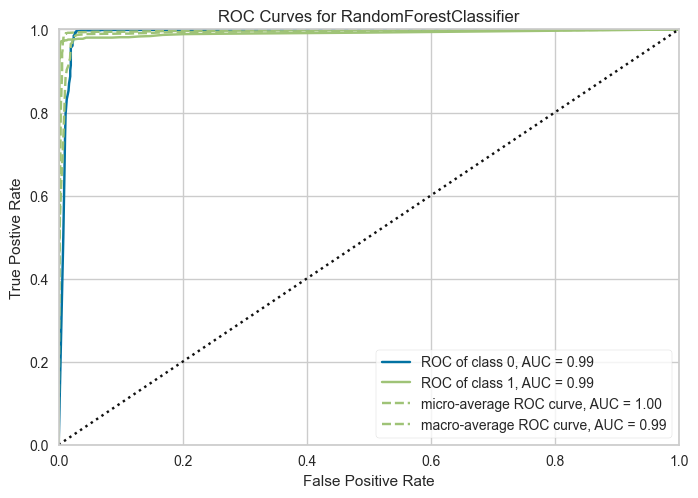

In [10]:
plot_model(best_model, plot = 'auc')

## Confusion Matrix
The ConfusionMatrix visualizer is a ScoreVisualizer that takes a fitted scikit-learn classifier and a set of test X and y values and returns a report showing how each of the test values predicted classes compare to their actual classes. Data scientists use confusion matrices to understand which classes are most easily confused. These provide similar information as what is available in a ClassificationReport, but rather than top-level scores, they provide deeper insight into the classification of individual data points.

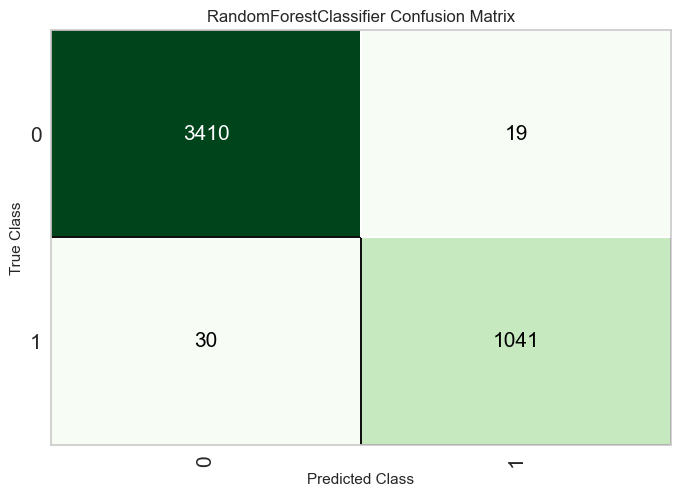

In [11]:
plot_model(best_model, plot = 'confusion_matrix')

## Precision Recall Curve
The PrecisionRecallCurve shows the tradeoff between a classifier’s precision, a measure of result relevancy, and recall, a measure of completeness. For each class, precision is defined as the ratio of true positives to the sum of true and false positives, and recall is the ratio of true positives to the sum of true positives and false negatives.

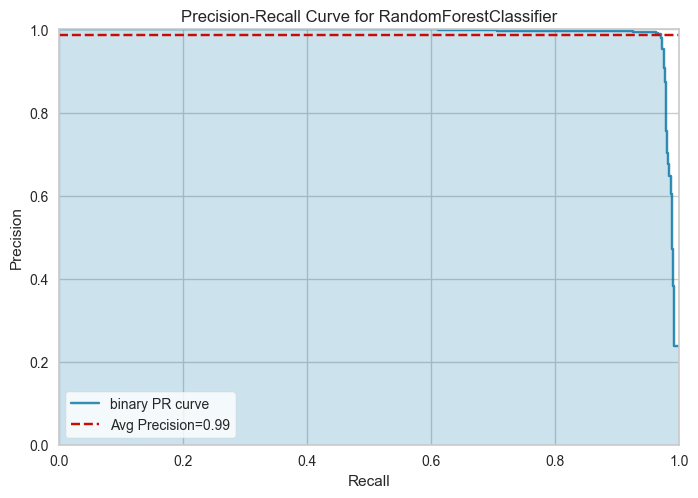

In [12]:
plot_model(best_model, plot = 'pr')

## Decision Boundary

The DecisionBoundariesVisualizer is a bivariate data visualization algorithm that plots the decision boundaries of each class.

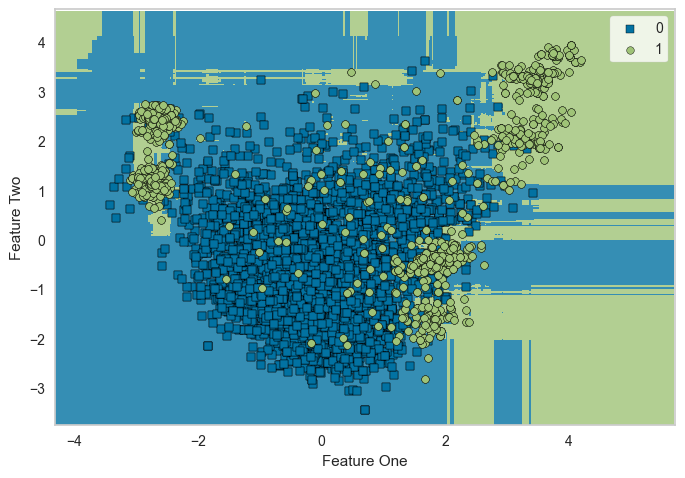

In [13]:
plot_model(best_model, plot = 'boundary')

## Calibration Curve

When performing classification one often wants to predict not only the class label but also the associated probability to give a level of confidence in the prediction. This is what calibration curve shows.

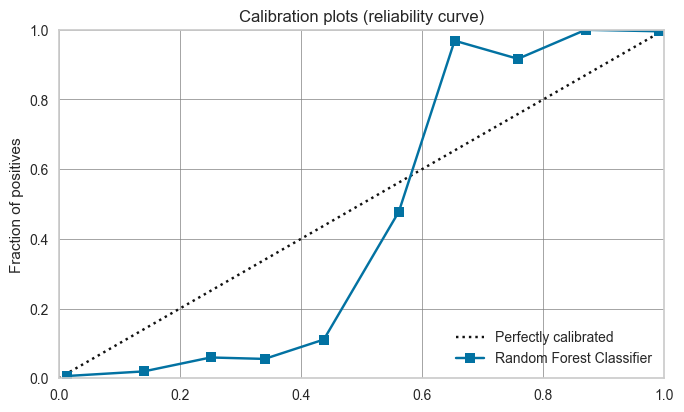

In [14]:
plot_model(best_model, plot = 'calibration')

## Cumulative Gain Curve

The cumulative gains curve is an evaluation curve that assesses the performance of the model and compares the results with the random pick. It shows the percentage of targets reached when considering a certain percentage of the population with the highest probability to be target according to the model.

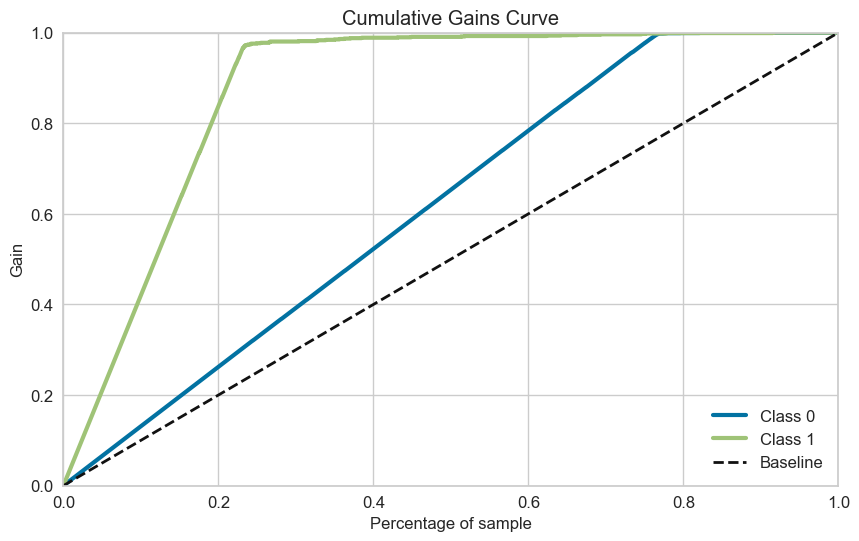

In [15]:
plot_model(best_model, plot = 'gain')

# Lift Plot

A lift chart graphically represents the improvement that a mining model provides when compared against a random guess, and measures the change in terms of a lift score. By comparing the lift scores for different models, you can determine which model is best.

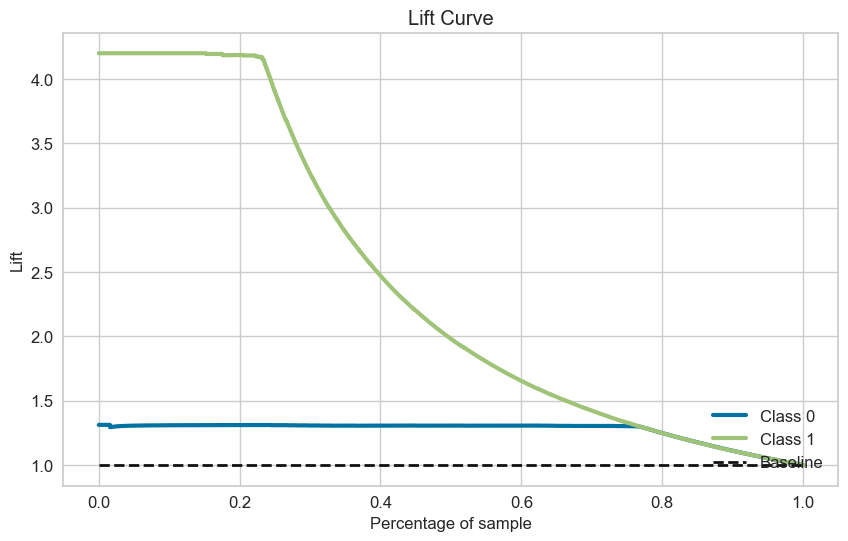

In [16]:
plot_model(best_model, plot = 'lift')

## Validation Curve

Model validation is used to determine how effective an estimator is on data that it has been trained on as well as how generalizable it is to new input. To measure a model’s performance we first split the dataset into training and test splits, fitting the model on the training data and scoring it on the reserved test data.

In order to maximize the score, the hyperparameters of the model must be selected which best allow the model to operate in the specified feature space. Most models have multiple hyperparameters and the best way to choose a combination of those parameters is with a grid search. However, it is sometimes useful to plot the influence of a single hyperparameter on the training and test data to determine if the estimator is underfitting or overfitting for some hyperparameter values.

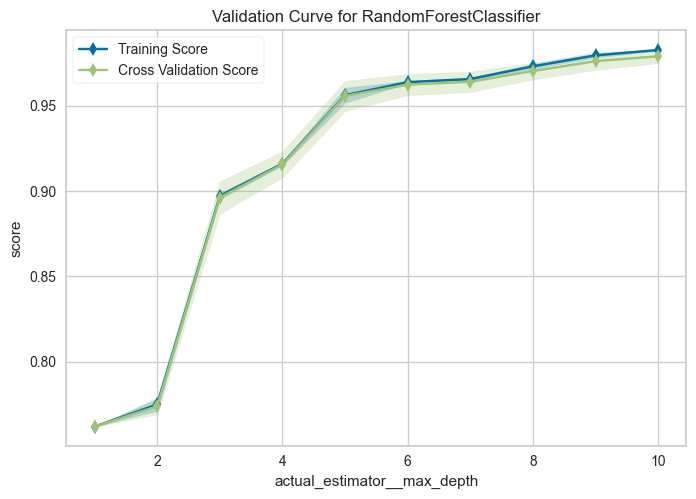

In [17]:
plot_model(best_model, plot = 'vc')

## Learning Curve

A learning curve shows the relationship of the training score versus the cross validated test score for an estimator with a varying number of training samples. This visualization is typically used to show two things:

How much the estimator benefits from more data (e.g. do we have “enough data” or will the estimator get better if used in an online fashion).

If the estimator is more sensitive to error due to variance vs. error due to bias.

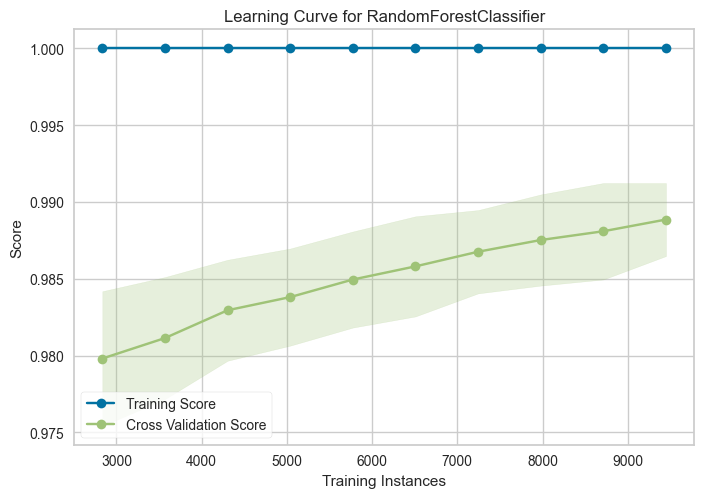

In [18]:
plot_model(best_model, plot = 'learning')

## Feature Importance

Shows the top 10 important features for model. 

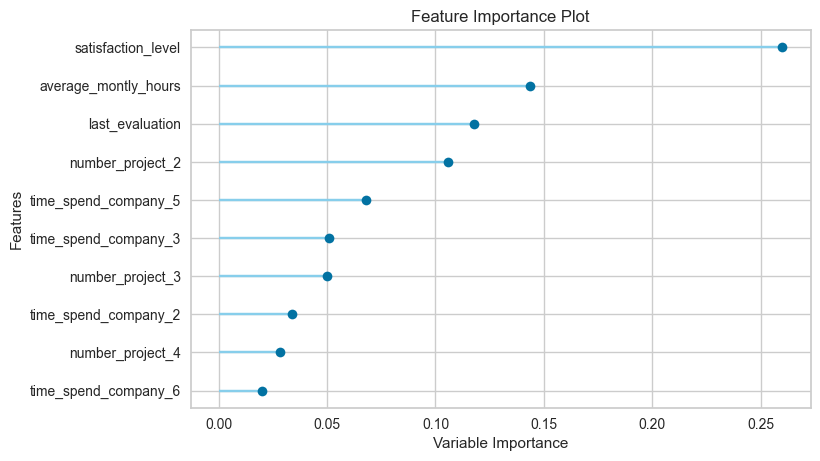

In [19]:
plot_model(best_model, plot = 'feature')

# 👉 Interpret Model

In [20]:
# create a lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9810,0.9954,0.9480,0.9713,0.9595,0.9471,0.9472
1,0.9829,0.9952,0.9440,0.9833,0.9633,0.9521,0.9524
2,0.9895,0.9974,0.9680,0.9878,0.9778,0.9709,0.9710
3,0.9829,0.9940,0.9440,0.9833,0.9633,0.9521,0.9524
4,0.9867,0.9930,0.9600,0.9836,0.9717,0.9629,0.9631
5,0.9857,0.9950,0.9520,0.9876,0.9695,0.9601,0.9604
6,0.9886,0.9961,0.9640,0.9877,0.9757,0.9682,0.9684
7,0.9800,0.9876,0.9280,0.9872,0.9567,0.9437,0.9445
8,0.9886,0.9923,0.9640,0.9877,0.9757,0.9682,0.9684
9,0.9847,0.9914,0.9520,0.9835,0.9675,0.9575,0.9577


## SHAP Summary Plot

The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. The color represents the value of the feature from low to high. Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.

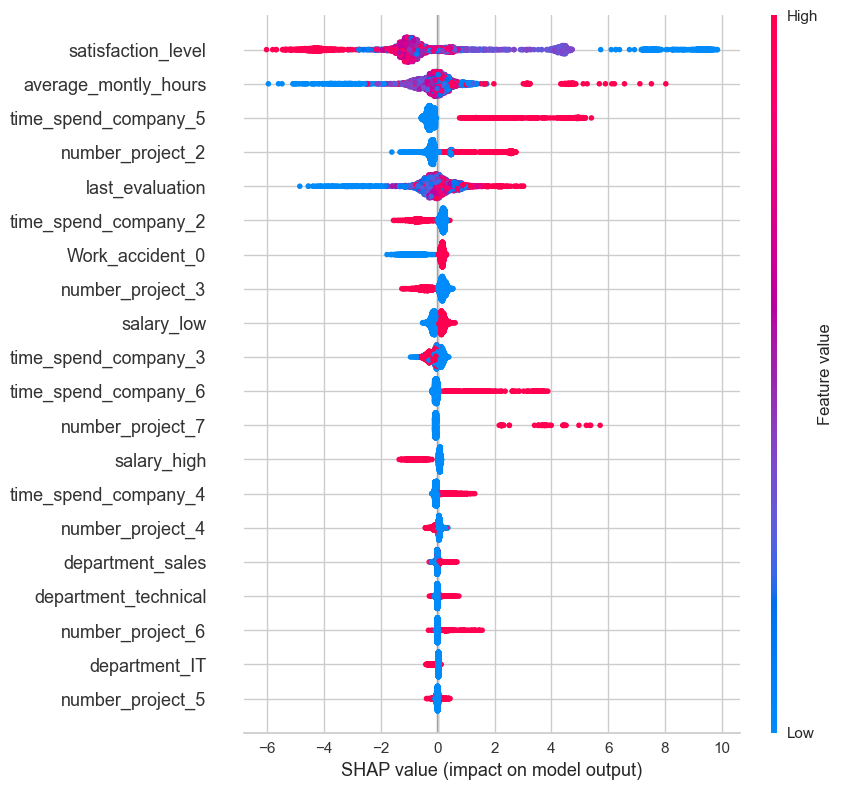

In [21]:
interpret_model(lightgbm)

# 👉 Predict New Observations

In [22]:
new_data = data.copy()
new_data.drop(['left'], axis=1, inplace=True)
new_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157.0,3,0,0,NaN,low
1,0.80,0.86,5,262.0,6,0,0,sales,NaN
2,0.11,0.88,7,272.0,4,0,0,sales,NaN
3,0.72,NaN,5,NaN,5,0,0,sales,low
4,0.37,0.52,2,159.0,3,0,0,sales,low


In [23]:
# finalize means fit the entire pipeline on entire dataset including test data
# this should be the last step of your modeling (not mandatory)

final_best_model = finalize_model(best_model)

In [24]:
predictions = predict_model(final_best_model, data=new_data)
predictions.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,Label,Score
0,0.38,0.53,2,157.0,3,0,0,NaN,low,1,1.00
1,0.80,0.86,5,262.0,6,0,0,sales,NaN,1,0.95
2,0.11,0.88,7,272.0,4,0,0,sales,NaN,1,0.99
3,0.72,NaN,5,NaN,5,0,0,sales,low,1,0.71
4,0.37,0.52,2,159.0,3,0,0,sales,low,1,1.00


# 👉 Save / Load Pipeline with PyCaret

In [25]:
save_model(final_best_model, 'pycaret_binary_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='left',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_l

In [26]:
loaded_pycaret_pipeline = load_model('pycaret_binary_pipeline')
print(loaded_pycaret_pipeline)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='left',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
        

In [27]:
# display as image
from sklearn import set_config
set_config(display = 'diagram')

In [28]:
loaded_pycaret_pipeline

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='left',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False)]],
         verbose=False)